In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_usersjar():
    usersjar = "/home/lang/Software/HEASARC-Xamin/users.jar"
    return usersjar

def query_fermigbrst(cdir='./'):
    fermigbrst = cdir+'/fermigbrst_test.txt'
    if not os.path.exists(fermigbrst):
        usersjar = get_usersjar()
        assert os.path.exists(usersjar), """'users.jar' is not available! 
            download users.jar at:
            https://heasarc.gsfc.nasa.gov/xamin/distrib/users.jar
            and update the path of usersjar in 'personal_settings.py'."""
        java_ready = os.system("java --version")
        assert not java_ready, """java not properly installed!
            Install Oracle Java 10 (JDK 10) in Ubuntu or Linux Mint from PPA
            $ sudo add-apt-repository ppa:linuxuprising/java
            $ sudo apt update
            $ sudo apt install oracle-java10-installer"""
        fields = ("trigger_name,t90,t90_error,t90_start,"
            "Flnc_Band_Epeak,scat_detector_mask")
        print('querying fermigbrst catalog using HEASARC-Xamin-users.jar ...')
        query_ready = os.system("java -jar "+usersjar+" table=fermigbrst fields="
                +fields+" sortvar=trigger_name output="+cdir+"/fermigbrst_test.txt")
        assert not query_ready, 'failed in querying fermigbrst catalog!'
        print('successful in querying fermigbrst catalog!')
    return fermigbrst

fermigbrst = query_fermigbrst()

querying fermigbrst catalog using HEASARC-Xamin-users.jar ...
successful in querying fermigbrst catalog!


In [2]:
!pwd

/home/lang/work/GBM/catalog/statistics


In [2]:
df = pd.read_csv(fermigbrst,delimiter='|',header=0,skipfooter=3,engine='python')
trigger_name = df['trigger_name'].apply(lambda x:x.strip()).values
t90_str = df[df.columns[1]].apply(lambda x:x.strip()).values
t90_error_str = df[df.columns[2]].apply(lambda x:x.strip()).values
t90_start_str = df[df.columns[3]].apply(lambda x:x.strip()).values
fluence_str = df[df.columns[9]].apply(lambda x:x.strip()).values
fluence_error_str = df[df.columns[10]].apply(lambda x:x.strip()).values
flux_str = df[df.columns[11]].apply(lambda x:x.strip()).values
flux_error_str = df[df.columns[12]].apply(lambda x:x.strip()).values
flux_time_str = df[df.columns[13]].apply(lambda x:x.strip()).values
burst_number = len(trigger_name)
print('burst_number = ',burst_number)

burst_number =  2640


In [3]:
bad_data_seq = []
for i in range(burst_number):
    if (t90_str[i]=='null' or t90_error_str[i]=='null' or t90_start_str[i]=='null' 
        or fluence_str[i]=='null' or fluence_error_str[i]=='null' or flux_str[i]=='null'
        or flux_error_str[i]=='null' or flux_time_str[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_seq = ', bad_data_seq)

trigger_name = np.delete(trigger_name,bad_data_seq)
t90_str = np.delete(t90_str,bad_data_seq)
t90_error_str = np.delete(t90_error_str,bad_data_seq)
t90_start_str = np.delete(t90_start_str,bad_data_seq)
fluence_str = np.delete(fluence_str,bad_data_seq)
fluence_error_str = np.delete(fluence_error_str,bad_data_seq)
flux_str = np.delete(flux_str,bad_data_seq)
flux_error_str = np.delete(flux_error_str,bad_data_seq)
flux_time_str = np.delete(flux_time_str,bad_data_seq)
burst_number = burst_number-len(bad_data_seq)
print('burst_number = ',burst_number)

t90 = t90_str.astype(np.float)
t90_error = t90_error_str.astype(np.float)
t90_start = t90_start_str.astype(np.float)
fluence = fluence_str.astype(np.float)
fluence_error = fluence_error_str.astype(np.float)
flux = flux_str.astype(np.float)
flux_error = flux_error_str.astype(np.float)
flux_time = flux_time_str.astype(np.float)

bad_data_seq =  [243]
burst_number =  2639


In [4]:
x = flux*(t90**0.6)*1.5e-7

Text(0.5, 0.04, 'peak_flux(photon cm$^{-2}$ s$^{-1}$)* $T_{90}^{0.6}$ * 1.6*10$^{-7}$ (erg/photon)')

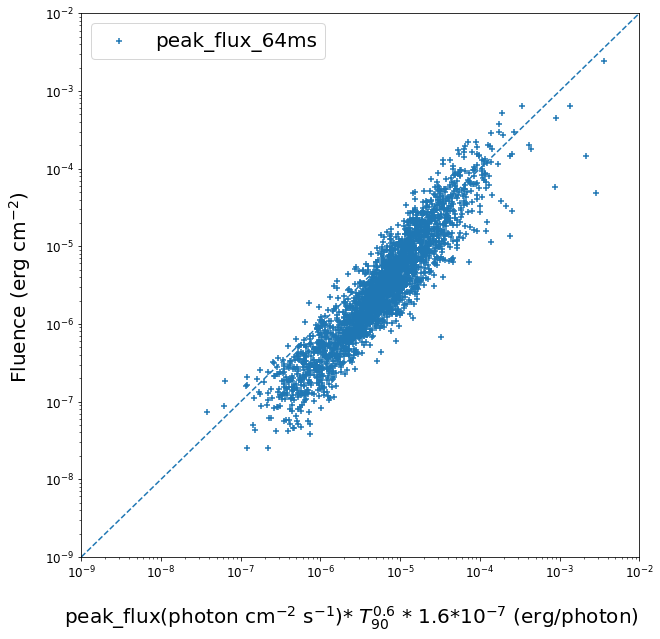

In [8]:
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.scatter(x,fluence,marker='+',label='peak_flux_64ms')
plt.plot([1e-9,1e-2],[1e-9,1e-2],ls='--')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)
plt.xlim([1e-9,1e-2])
plt.ylim([1e-9,1e-2])
axis.tick_params(labelsize=12)
fig.text(0.04,0.5,'Fluence (erg cm$^{-2}$)',ha='center',
            va='center',rotation='vertical',fontsize=20)
fig.text(0.5,0.04,'peak_flux(photon cm$^{-2}$ s$^{-1}$)* $T_{90}^{0.6}$ * 1.6*10$^{-7}$ (erg/photon)',ha='center',
            va='center',fontsize=20)